In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from xgboost import XGBRFClassifier
# from sklearn.feature_selection


from colorama import Fore

y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
bl_ = Fore.BLACK

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10,8)

In [2]:
class config:
    CSV_PATH = 'csv_files/'
    RANDOM_SEED = 15

In [3]:
os.listdir(config.CSV_PATH)

['test.csv', 'train.csv']

In [4]:
train_df = pd.read_csv(config.CSV_PATH + 'train.csv')
test_df = pd.read_csv(config.CSV_PATH + 'test.csv')

In [5]:
train_df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  54180    951.753       388.728347       178.948203      2.172295   
1  42023    746.715       272.962686       196.334047      1.390297   
2  38600    716.517       254.129288       193.991641      1.310001   
3  62298    992.583       327.685094       242.658033      1.350399   
4  74456   1085.466       447.665972       212.382328      2.107831   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.887741       55014     262.648279  0.580210  0.984840   0.751624   
1      0.694730       42365     231.312225  0.795348  0.991927   0.947081   
2      0.645976       38940     221.691331  0.715265  0.991269   0.944809   
3      0.672032       63353     281.638558  0.801157  0.983347   0.794603   
4      0.880298       75096     307.896612  0.788821  0.991478   0.794104   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0     0.675660      0.007175      0.000922      0.456517      0.991689   
1     0.847413      0.006496      0.002066      0.718109      0.998386   
2     0.872356      0.006584      0.002352      0.761006      0.996919   
3     0.859479      0.005260      0.001771      0.738705      0.997546   
4     0.687782      0.006012      0.000830      0.473044      0.997097   

      Class  
0     HOROZ  
1  DERMASON  
2     SEKER  
3  BARBUNYA  
4     HOROZ

In [6]:
train_df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [7]:
train_df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

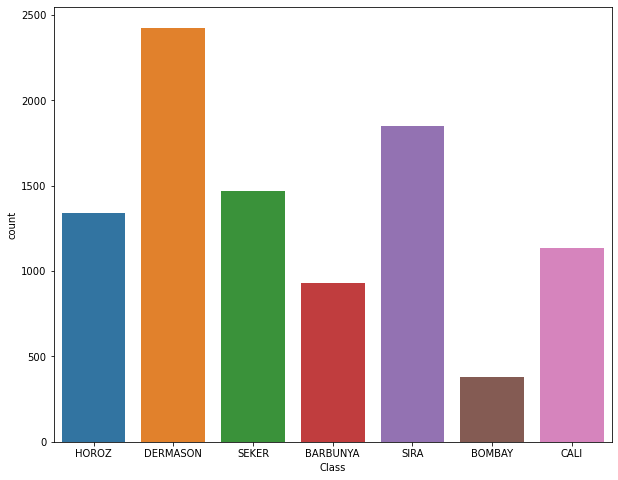

In [8]:
sns.countplot(data = train_df, x = 'Class')

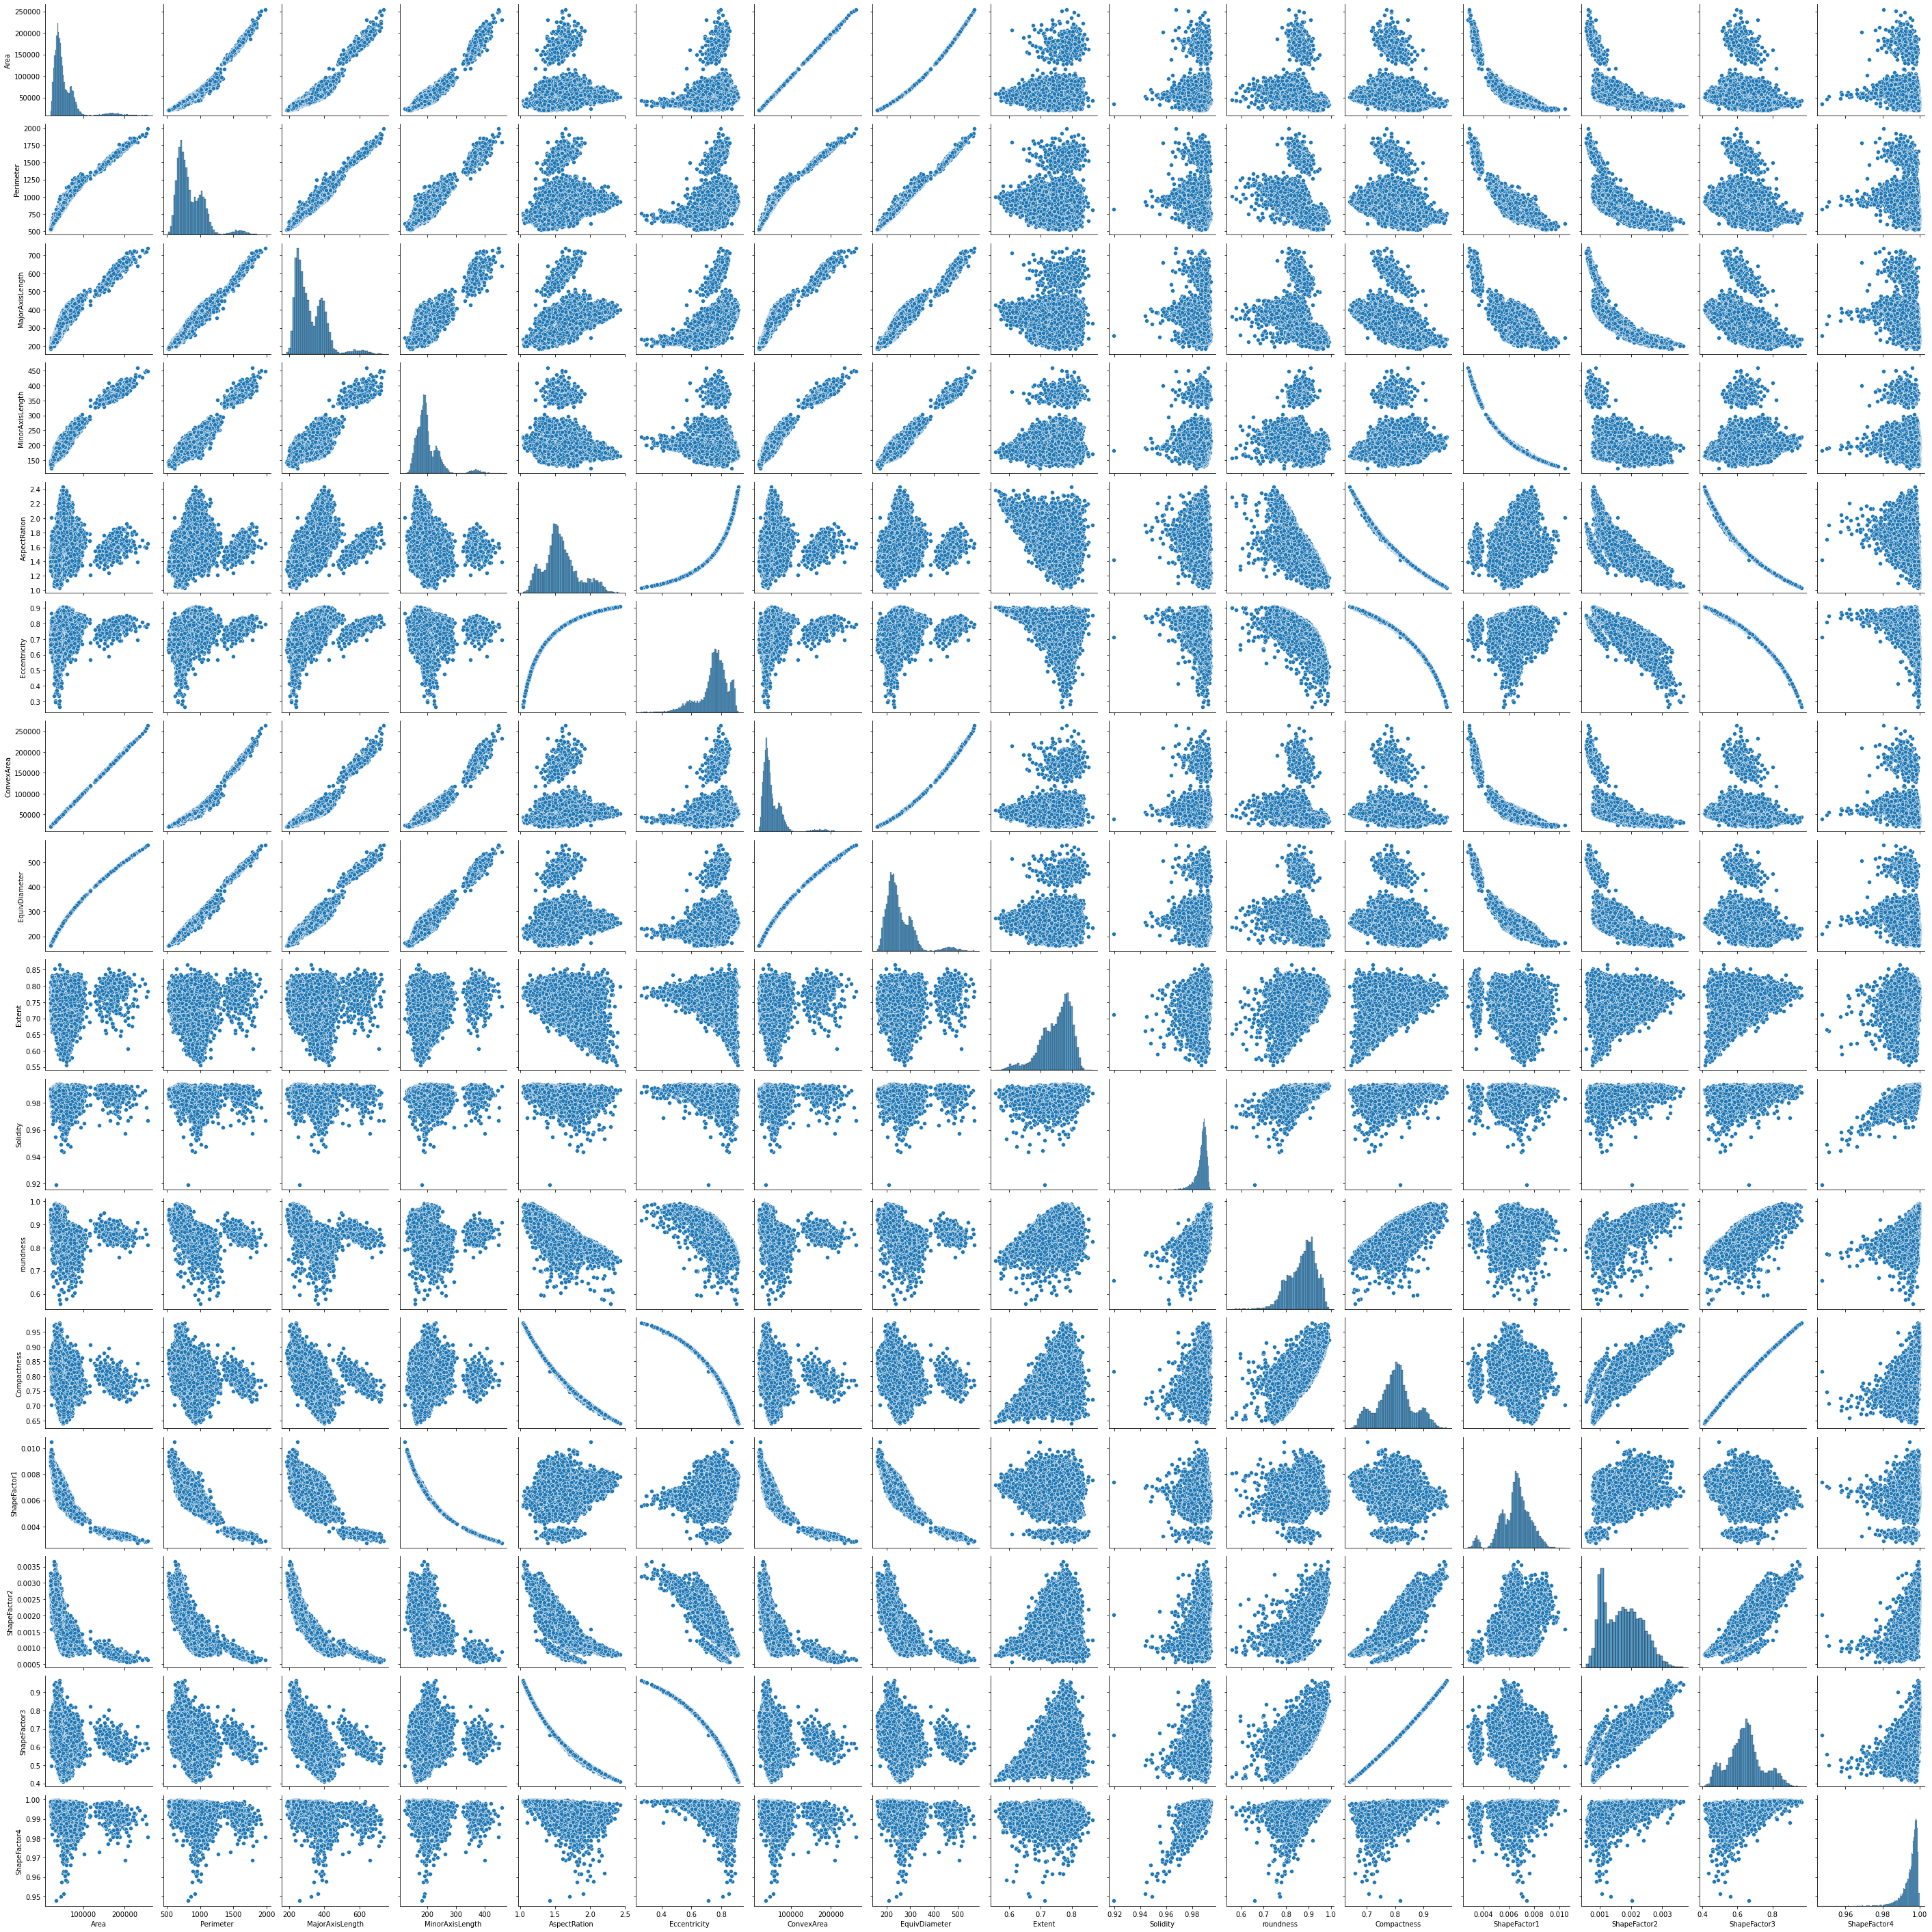

In [11]:
sns.pairplot(data = train_df)

In [13]:
train_df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

<AxesSubplot:xlabel='Compactness', ylabel='Perimeter'>

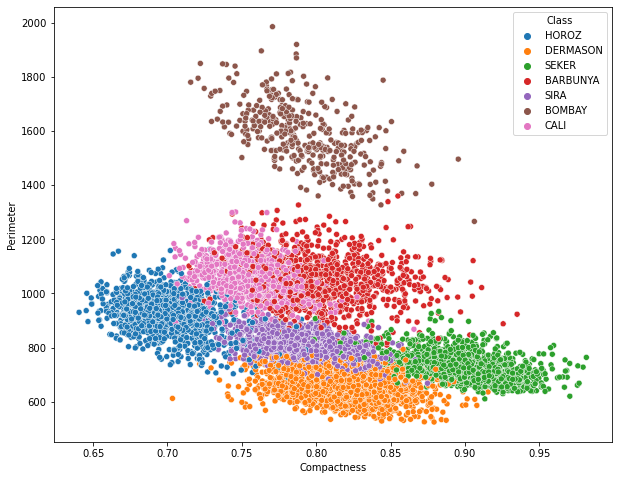

In [20]:
sns.scatterplot(data = train_df, y = 'Perimeter', x = 'Compactness', hue = 'Class')

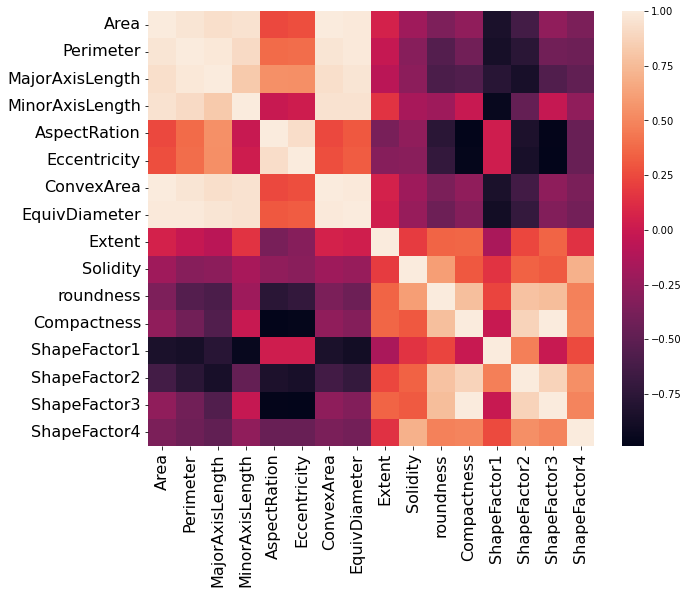

In [25]:
sns.heatmap(train_df.corr())
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

In [31]:
encoder = LabelEncoder()
Y = encoder.fit_transform(train_df.iloc[:,-1])

In [32]:
Y

array([4, 3, 5, ..., 3, 4, 6])

In [49]:
k_best = SelectKBest(f_classif)
X = k_best.fit_transform(train_df.iloc[:,:-1], Y)

In [50]:
k_best.get_feature_names_out()

array(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'ConvexArea', 'EquivDiameter', 'Compactness',
       'ShapeFactor1', 'ShapeFactor2'], dtype=object)

In [48]:
k_best.get_feature_names_out()

array(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter',
       'Compactness', 'ShapeFactor3'], dtype=object)

In [34]:
X.shape

(9528, 10)

In [35]:
train_df.shape

(9528, 17)

In [68]:
logistic = LogisticRegression(max_iter= 1000)
logistic.fit(X, Y)

LogisticRegression(max_iter=1000)

In [69]:
logistic.score(X,Y)

0.8663937867338372

In [70]:
xgb = XGBRFClassifier()
xgb.fit(X, Y)

XGBRFClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bytree=1,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
                importance_type=None, interaction_constraints='', max_bin=256,
                max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
                max_leaves=0, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=0,
                num_parallel_tree=100, objective='multi:softprob',
                predictor='auto', random_state=0, reg_alpha=0,
                sampling_method='uniform', scale_pos_weight=None, ...)

In [71]:
xgb.score(X,Y)

0.9209697732997482